In [2]:
import numpy as np 
import pandas as pd 
import os
import joblib

## Importing Libraries for Machine learning

In [5]:
# !pip install matplotlib

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [7]:
# cd "used-car-price-prediction-randomforest"

In [8]:
# cd "used-car-price-prediction-randomforest"

## Reading the data

In [9]:
df=pd.read_csv('ss.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


## Convert the text values into the numerical values for the model

In [10]:
for i in df:
    print(df[i].value_counts)

<bound method IndexOpsMixin.value_counts of 0         ritz
1          sx4
2         ciaz
3      wagon r
4        swift
        ...   
296       city
297       brio
298       city
299       city
300       brio
Name: Car_Name, Length: 301, dtype: object>
<bound method IndexOpsMixin.value_counts of 0      2014
1      2013
2      2017
3      2011
4      2014
       ... 
296    2016
297    2015
298    2009
299    2017
300    2016
Name: Year, Length: 301, dtype: int64>
<bound method IndexOpsMixin.value_counts of 0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64>
<bound method IndexOpsMixin.value_counts of 0       5.59
1       9.54
2       9.85
3       4.15
4       6.87
       ...  
296    11.60
297     5.90
298    11.00
299    12.50
300     5.90
Name: Present_Price, Length: 301, dtype: float64>
<bound method IndexOpsMixin.value_counts of 0      27000
1

In [11]:
fuel_type,seller_type,transmission=LabelEncoder(),LabelEncoder(),LabelEncoder()

## Fit into the model and transform it

In [12]:
df['Fuel_Type']=fuel_type.fit_transform(df['Fuel_Type'])
df['Seller_Type']=seller_type.fit_transform(df['Seller_Type'])
df['Transmission']=transmission.fit_transform(df['Transmission'])

## Feauture Selection

In [13]:
X=df[['Year','Present_Price', 'Kms_Driven',
'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]
Y=df[[ 'Selling_Price']]

## Make the models in the list to use it

In [14]:
model=LinearRegression()

## Split the data for traing and testing purpose

In [15]:
x_tr,x_te,y_tr,y_te=train_test_split(X,Y,random_state=42)

## Ploting with the use of matplot lib

In [16]:
def plot_fig(y_te,y_pr):
    plt.scatter(y_te,y_te,color='blue',label='Actual Labels')
    plt.scatter(y_te,y_pr,color='green',label='Predicted Labels')
    #plt.plot([min(y_te),max(y_te)],[min(y_te),max(y_te)],color='red',linestyle='--',label='Perfect Prediction')
    plt.xlabel('Actual Labels')
    plt.ylabel('Predicted Labels')
    plt.title("Actual vs Predicted Labels")
    plt.legend()
    plt.tight_layout()
    plt.show()

## Iterate over the list and make the models run and plot the predicted values

Absolute_Score 1.233084338259372
Mean_Squared_Score 3.4316043692581433


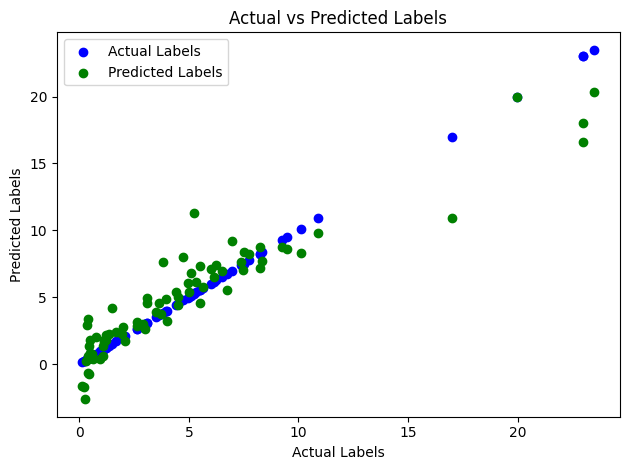

In [17]:

model.fit(x_tr,y_tr)
y_pr=model.predict(x_te)
print("Absolute_Score",mean_absolute_error(y_te,y_pr))
print("Mean_Squared_Score",mean_squared_error(y_te,y_pr))
plot_fig(y_te,y_pr)

In [18]:
file='models/linear_reg.joblib'
joblib.dump(model,file,protocol=5)
label_encoders = [fuel_type,seller_type,transmission]
file1 = 'models/labelencoder.joblib'
joblib.dump(label_encoders,file1,protocol=5)

['models/labelencoder.joblib']